In [1]:
import matplotlib.pyplot as plt
import sys 
from pathlib import Path

sys.path.insert(0, str(Path().absolute().parents[1]))

from cv_prince.chap_07_complex_densities.gaussians import Gaussian
from cv_prince.chap_07_complex_densities.factor import ExpectationMaximisationFactor
from notebooks.utils import create_cov_based_on_angle_and_axis_scale

In [2]:
# Gaussian
mean = (1.0, 4.0)
cov = create_cov_based_on_angle_and_axis_scale(30, (1, 1/100))
gaussian = Gaussian(mean=mean, cov=cov)

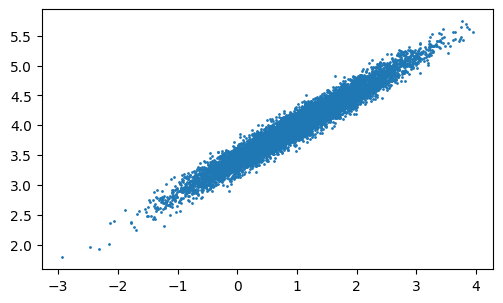

In [3]:
samples = gaussian.sample(10000, seed=12345)

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(samples[:, 0], samples[:, 1], s=1)
axes.set_aspect("equal")
fig.tight_layout()

In [4]:
em_fitter = ExpectationMaximisationFactor(num_factors=1, seed=12345)
em_fitter.fit(samples, max_iter=1000)
print(em_fitter)

 34%|███▍      | 345/1000 [00:00<00:00, 719.62it/s]

Factor analysis with the following parameters 
* mean: 
[0.987 3.992] 

* diag_cov: 
[0.02  0.007] 

* factor_mtx: 
[[0.851]
 [0.5  ]] 



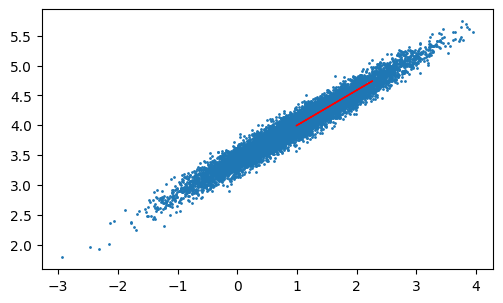

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(samples[:, 0], samples[:, 1], s=1)
axes.set_aspect("equal")
axes.arrow(
    em_fitter.mean[0], 
    em_fitter.mean[1],
    1.5*em_fitter.factor_mtx[0,0],
    1.5*em_fitter.factor_mtx[1,0],
    color="r"
)
fig.tight_layout()